In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
raw_data = pd.read_csv("https://raw.githubusercontent.com/srikarthadaka/data_science/main/association_rules/book.csv")
raw_data.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [6]:
raw_data.describe()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.423000,0.247500,0.43100,0.282000,0.214500,0.241000,0.276000,0.113500,0.037000,0.048500,0.108500
std,0.494159,0.431668,0.49534,0.450086,0.410578,0.427797,0.447129,0.317282,0.188809,0.214874,0.311089
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
raw_data.sum()

ChildBks     846
YouthBks     495
CookBks      862
DoItYBks     564
RefBks       429
ArtBks       482
GeogBks      552
ItalCook     227
ItalAtlas     74
ItalArt       97
Florence     217
dtype: int64

In [16]:
import mlxtend
import itertools
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [20]:
first = pd.DataFrame(raw_data.sum() / raw_data.shape[0], columns = ["Support"]).sort_values("Support", ascending = False)
first

,Support
CookBks,0.4310
ChildBks,0.4230
DoItYBks,0.2820
GeogBks,0.2760
YouthBks,0.2475
ArtBks,0.2410
RefBks,0.2145
ItalCook,0.1135
Florence,0.1085
ItalArt,0.0485


In [21]:
second = list(itertools.combinations(first.index, 2))
second = [list(i) for i in second]
second[:10]

[['CookBks', 'ChildBks'],
 ['CookBks', 'DoItYBks'],
 ['CookBks', 'GeogBks'],
 ['CookBks', 'YouthBks'],
 ['CookBks', 'ArtBks'],
 ['CookBks', 'RefBks'],
 ['CookBks', 'ItalCook'],
 ['CookBks', 'Florence'],
 ['CookBks', 'ItalArt'],
 ['CookBks', 'ItalAtlas']]

In [24]:
third = list(itertools.combinations(first.index, 3))
third = [list(i) for i in third]
third[:10]

[['CookBks', 'ChildBks', 'DoItYBks'],
 ['CookBks', 'ChildBks', 'GeogBks'],
 ['CookBks', 'ChildBks', 'YouthBks'],
 ['CookBks', 'ChildBks', 'ArtBks'],
 ['CookBks', 'ChildBks', 'RefBks'],
 ['CookBks', 'ChildBks', 'ItalCook'],
 ['CookBks', 'ChildBks', 'Florence'],
 ['CookBks', 'ChildBks', 'ItalArt'],
 ['CookBks', 'ChildBks', 'ItalAtlas'],
 ['CookBks', 'DoItYBks', 'GeogBks']]

In [27]:
fourth = list(itertools.combinations(first.index, 4))
fourth = [list(i) for i in fourth]
fourth[:10]

[['CookBks', 'ChildBks', 'DoItYBks', 'GeogBks'],
 ['CookBks', 'ChildBks', 'DoItYBks', 'YouthBks'],
 ['CookBks', 'ChildBks', 'DoItYBks', 'ArtBks'],
 ['CookBks', 'ChildBks', 'DoItYBks', 'RefBks'],
 ['CookBks', 'ChildBks', 'DoItYBks', 'ItalCook'],
 ['CookBks', 'ChildBks', 'DoItYBks', 'Florence'],
 ['CookBks', 'ChildBks', 'DoItYBks', 'ItalArt'],
 ['CookBks', 'ChildBks', 'DoItYBks', 'ItalAtlas'],
 ['CookBks', 'ChildBks', 'GeogBks', 'YouthBks'],
 ['CookBks', 'ChildBks', 'GeogBks', 'ArtBks']]

In [18]:
frequent_books = apriori(raw_data, min_support=0.1, use_colnames=True)
frequent_books

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [19]:
rules = association_rules(frequent_books, metric="lift", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
95,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
96,"(ArtBks, GeogBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
97,(CookBks),"(ArtBks, GeogBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237
98,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327


In [35]:
rules.sort_values('lift',ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
29,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
76,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
81,(GeogBks),"(ArtBks, ChildBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
87,(ArtBks),"(CookBks, DoItYBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
82,"(CookBks, DoItYBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797
99,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
94,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
95,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
98,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327


In [37]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
95,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
96,"(ArtBks, GeogBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
97,(CookBks),"(ArtBks, GeogBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237
98,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327


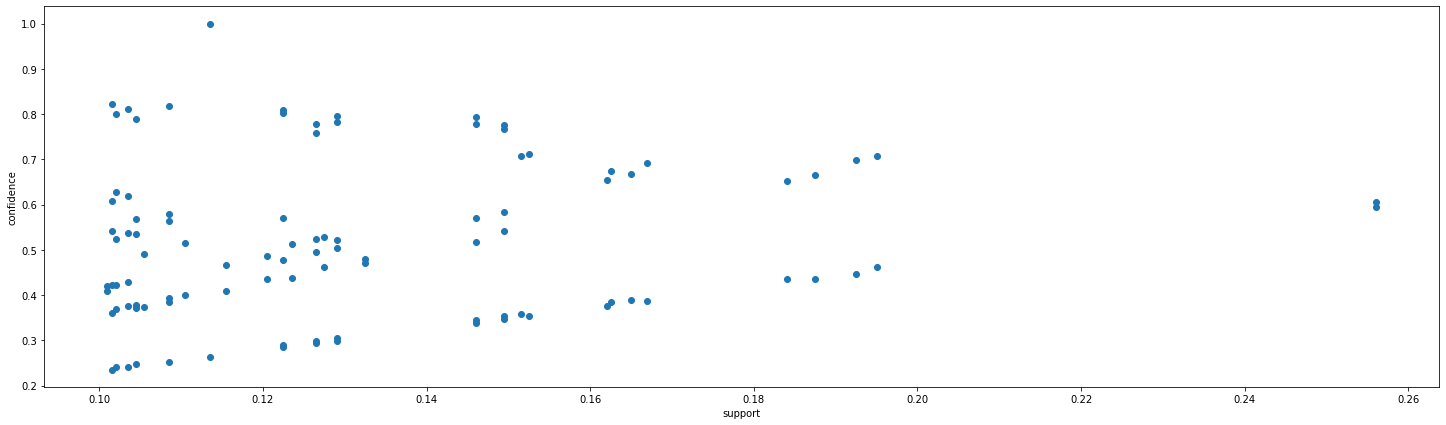

In [42]:
plt.figure(figsize=(25,7))
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()
